# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<a id='Intro'></a>

**1. **[What test is appropriate for this problem? Does CLT apply?](#Question 1)

**2. **[What are the null and alternate hypotheses?](#Question 2)

**3. **[Compute margin of error, confidence interval, and p-value.](#Question 3)

**4. **[Write a story describing the statistical significance in the context of the original problem.](#Question 4)

**5. **[Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?](#Question 5)

## <a id='Question 1'>What test is appropriate for this problem? Does CLT apply?</a>

In order to test whether race has significant impact on the rate of callbacks for resumes, a chi square test for independence can be used. Since race and callbacks are categorical variables, a chi-square test seems appropriate. A contingency table can be used to calculate the chi square statistics. The test uses the chi-square distribution which is based on sampling from a normal population. Since sampling from a normal population is important for a chi-square distribution the CLT does apply to the chi square test. It is also important to note that the independency test is valid only if the expected frequency for each cell in the contingency table is 5 or more.

[Back to Intro](#Intro)

## <a id='Question 2'>What are the null and alternate hypotheses?</a>

** The Null and Alternative hypothesis are as follows: **

** H0: ** Race and callback rates for resume are independent.

** H1: ** Race and callback rates for resume are not independent.

** α ** = 0.05


[Back to Intro](#Intro)

## <a id='Question 3'>Compute margin of error, confidence interval, and p-value.</a>

The chi-square test is a one tail test where it is statistically significant if the chi-square statistic is above the critical value. Hence a margin of error and confidency interval is not needed in a chi-square test of independency. 

In [13]:
# Create a contingency table

table = pd.crosstab(index=data.call, columns=data.race, margins=True)
table.columns = ['Black', 'White', 'Total']
table.index = ['No', 'Yes', 'Total']
table


,Black,White,Total
No,2278,2200,4478
Yes,157,235,392
Total,2435,2435,4870


**We can generate a visualization of the contingency table using a factor plot to give us a better idea of what is going on.**

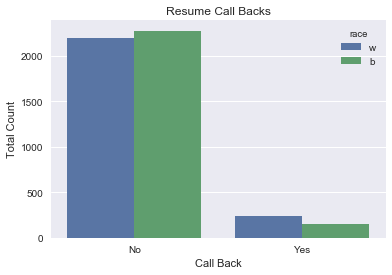

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig = sns.countplot(x="call", hue="race", data=data)
fig.set_xticklabels(["No", "Yes"])
fig.set_title('Resume Call Backs')
fig.set(xlabel="Call Back", ylabel="Total Count")

From the figure above it is easy to notice that people with the names that sound "White" have more callbacks (Yes) than the names that sound "Black". People with black sounding names have more call backs saying No than the white sound names. 

In [18]:
# form a contingency table without the margins (total row and column)
contingency_table = pd.crosstab(data.call, data.race)

In [29]:
# Use chi2_contingency to calculate the chi-square statistic, p value, degree of freedom, and expected frequency
chi_sq, p_val, df, expected = stats.chi2_contingency(contingency_table)

# It is important to check if the expected frequency for each cell in the contingency table is 5 or more. Proceed with the
# test only if this condition is met.
print("Contingency Table: \n", contingency_table)
print("Expected Frequency: \n", expected)



Contingency Table: 
 race     b     w
call            
0.0   2278  2200
1.0    157   235
Expected Frequency: 
 [[ 2239.  2239.]
 [  196.   196.]]


** We can proceed with the test since the expected frequency in all the cells of the contingency table is 5 or above.**

In [30]:
print("Chi Sqauare Statistic: ", chi_sq)
print("P Value: ", p_val)
print("Degree of Freedom: ", df)

Chi Sqauare Statistic:  16.4490285842
P Value:  4.99757838996e-05
Degree of Freedom:  1


In [33]:
cri_critical = stats.chi2.isf(q=0.05, df=df)
print("Chi-sqaure critical value: ", cri_critical)
print("Is chi-sqaure statistic more than chi-square critical value? ", chi_sq > cri_critical)

Chi-sqaure critical value:  3.84145882069
Is chi-sqaure statistic more than chi-square critical value?  True


In [34]:
print("Is p value greater than or equal to alpha? ", p_val <= 0.05)

Is p value greater than or equal to alpha?  True


[Back to Intro](#Intro)

## <a id='Question 4'>Write a story describing the statistical significance in the context of the original problem.</a>

It can be seen that the chi-sqaure statistic (16.449) is more than the chi-square critical value (3.841). We can reject the null hypothesis in favor of the alternative hypothesis. This means that race and callback rates for resume are not independent. There is a relationship between race and callback rates for resume. We can also use the p-value approach and see if the conclusion is the same as the conclusion we reached by using the critical value approach.

We can reject the null hypothesis in favor of the alternative hypothesis if p value (4.99e-05) is less than or equal to 
alpha (0.05). Since this is true we can reject the null hypothesis. Both the critical value approach and p value approach lead us to the same conclusion that there is a relationship between race and callback rates for resume. 

[Back to Intro](#Intro)

## <a id='Question 5'>Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?</a>

From the analysis that was conducted it can be seen that Race/Name and callback rates have some association. However, the chi-square statistics analysis does not prove that race/name is the most important factor in the callback success. Race/Name is only one of the analysis that was done. There are other features that need to be taken into consideration to see if they contribute in the callback rates as well. For example, education, years of experience, number of jobs and many other features can be looked at to see if they contribute as well. One can use multiple features to form a linear regression and predict the callback successes. The coefficients of each feature can help determine how much the feature contributes in predicting the callback rates. 

[Back to Intro](#Intro)